# Pymaceuticals Inc.
---

### Analysis
-Majority of the mice experimented were treated using capomulin and ramicane.


-There appears to be a strong correlation between the weight and tumor volume for the capomulin treatment. The graphs show that heavier mice have larger tumors.


-Mouse l509's tumor volume decreased with the capomulin treatment


-Capomulin and Ramicane have shown to be most effective compared to Ceftamin and Infubinol 


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#merge both data sets
mouse_study = pd.merge(study_results, mouse_metadata, how="left", on= "Mouse ID")
# Display the data table for preview
mouse_study.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [3]:
# Checking the number of mice, use unique to generate a list
len(mouse_study['Mouse ID'].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#.duplicated
duplicate_mouse = mouse_study.loc[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse[0]

'g989'

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_study.loc[mouse_study["Mouse ID"] == duplicate_mouse[0]]
duplicate_mouse 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean= mouse_study[mouse_study["Mouse ID"].isin(duplicate_mouse)==False]
clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean["Mouse ID"].unique())

249

## Summary Statistics

In [8]:
#mean
means = clean.groupby("Drug Regimen").mean()
means["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [9]:
#medians
medians = clean.groupby("Drug Regimen").median()
medians["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [10]:
#var
variances= clean.groupby("Drug Regimen").var()
variances["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [11]:
#st dev
st_dev = clean.groupby("Drug Regimen").std()
st_dev["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [12]:
#errors
st_err = clean.groupby("Drug Regimen").sem()
sems= ["Tumor Volume (mm3)"]

In [13]:
#dictionary
summaryDict ={
    "Mean Tumor Volume": means["Tumor Volume (mm3)"],
    "Median Tumor Volume": medians["Tumor Volume (mm3)"],
    "Variance Tumor Volume": variances["Tumor Volume (mm3)"],
    "St.dev Tumor Volume": st_dev["Tumor Volume (mm3)"],
    "St. Err Tumor Volume": st_err["Tumor Volume (mm3)"]
}

df = pd.DataFrame(summaryDict)
df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,St.dev Tumor Volume,St. Err Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
#aggregate method
df2 = clean.groupby("Drug Regimen").agg(
    {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
)
df2


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [15]:
#generate the series
counts = clean["Drug Regimen"].value_counts()
counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

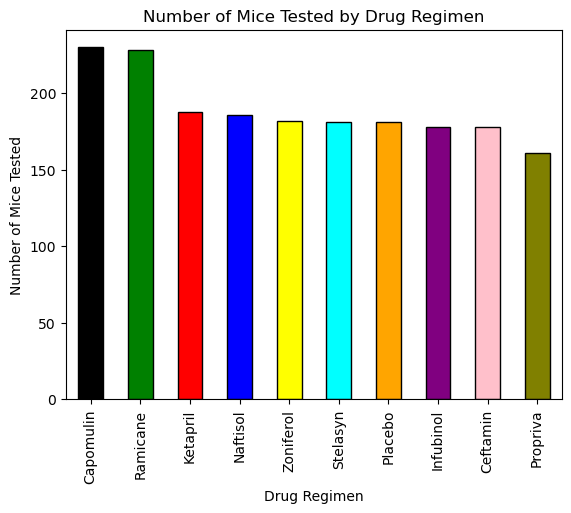

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

counts.plot(kind="bar",
           color= ['black', 'green', 'red', 'blue', 'yellow', 'cyan', 'orange','purple','pink','olive','blue'],
           edgecolor="black")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested by Drug Regimen")
plt.show()


In [17]:
counts.index.values

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype=object)

In [18]:
counts.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 161])

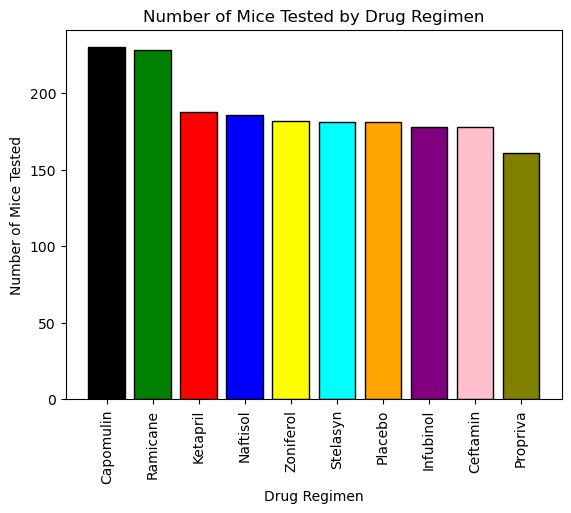

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(counts.index.values,
           counts.values,
           color= ['black', 'green', 'red', 'blue', 'yellow', 'cyan', 'orange','purple','pink','olive','blue'],
           edgecolor="black")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.title("Number of Mice Tested by Drug Regimen")
plt.show()

In [20]:
counts = clean["Sex"].value_counts()
counts

Male      958
Female    935
Name: Sex, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

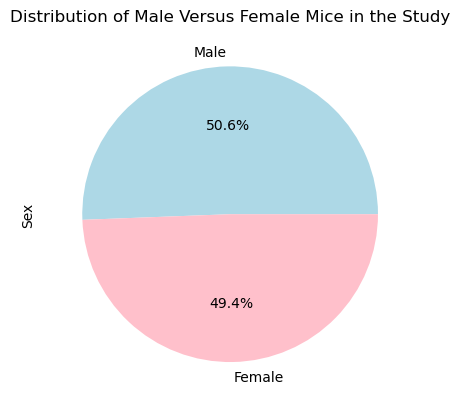

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts.plot(
    kind="pie",
    autopct="%1.1f%%",
    colors= ["lightblue", "pink"]
)
plt.title("Distribution of Male Versus Female Mice in the Study")
plt.show

In [22]:
counts.index.values #genders

array(['Male', 'Female'], dtype=object)

In [23]:
counts.values

array([958, 935])

<function matplotlib.pyplot.show(close=None, block=None)>

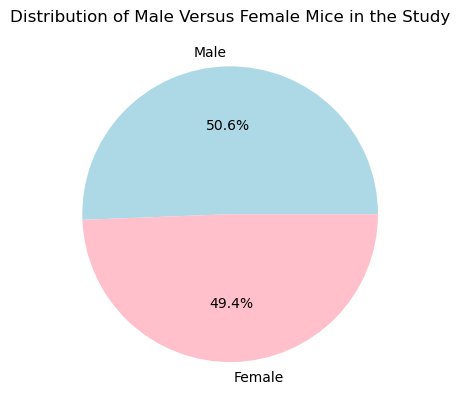

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(
    counts.values,
    labels = counts.index.values,
    autopct="%1.1f%%",
    colors= ["lightblue", "pink"]
)
plt.title("Distribution of Male Versus Female Mice in the Study")
plt.show

## Quartiles, Outliers and Boxplots

In [27]:
#max timepoint
#group by mouse id
#clean.head()
maxTime= clean.groupby("Mouse ID")["Timepoint"].max()
#dataframe, reset the index
maxTime= maxTime.reset_index()
maxTime.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [28]:
clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [29]:
#merge to keep data for the max timepoints
merged_data = maxTime.merge(clean, on=["Mouse ID", "Timepoint"], how= "left")
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [30]:
#Capomulin, Ramicane, Infubinol, Ceftamin

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


In [ ]:
for treatment in treatment_list:
    final_tumor = merged_data.loc[merged_data["Drug Regimen"]== treatment, "Tumor Volume (mm3)"]
#print tumor
final_tumor

In [32]:
for treatment in treatment_list:
    info = merged_data.loc[merged_data["Drug Regimen"]== treatment]
info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
3,a275,45,62.999356,3,Ceftamin,Female,20,28
21,b447,0,45.000000,0,Ceftamin,Male,2,30
22,b487,25,56.057749,1,Ceftamin,Female,6,28
25,b759,30,55.742829,1,Ceftamin,Female,12,25
58,f436,15,48.722078,2,Ceftamin,Female,3,25
76,h531,5,47.784682,0,Ceftamin,Male,5,27
89,j296,45,61.849023,3,Ceftamin,Female,24,30
95,k210,45,68.923185,3,Ceftamin,Male,15,28
107,l471,45,67.748662,1,Ceftamin,Female,7,28
108,l490,30,57.918381,3,Ceftamin,Male,24,26


In [44]:
#tumor volume list
tumor_list =[]

for treatment in treatment_list:
    final_tumor = merged_data.loc[merged_data["Drug Regimen"]== treatment, "Tumor Volume (mm3)"]
    
    #add to the empty tumor volume list
    tumor_list.append(final_tumor)
    

# Determine outliers using upper and lower quartiles
    quartiles = final_tumor.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_tumor.loc[(final_tumor < lower_bound) | (final_tumor > upper_bound)]

    if len(outliers) == 0:
        print(f"{treatment}'s potential outliers: None")
    else:
        output = f"{treatment}'s potential outliers: "
        for o in outliers:
            output += f"{o} "
        print(output)

Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers: 36.3213458 
Ceftamin's potential outliers: None


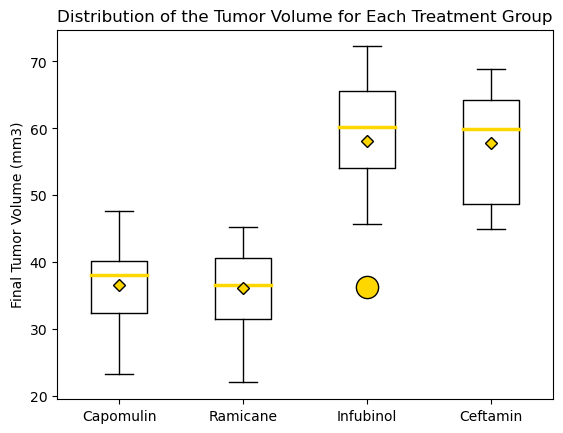

In [47]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker = 'o', markerfacecolor='gold', markersize =16,
                 markeredgecolor= 'black')
medianprops = dict(linestyle= '-', linewidth = 2.5, color='gold')
meanpointprops = dict(marker='D', markeredgecolor= 'black',
                     markerfacecolor= 'gold')
plt.boxplot(tumor_list, labels = treatment_list, flierprops=flierprops, medianprops=medianprops, meanprops=meanpointprops,
            showmeans=True)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title("Distribution of the Tumor Volume for Each Treatment Group")
plt.show()

In [48]:
clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [50]:
capomulinDF= clean.loc[clean["Drug Regimen"] == "Capomulin"]
capomulinDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


## Line and Scatter Plots

In [56]:
l509Data = capomulinDF.loc[capomulinDF["Mouse ID"]== 'l509']
l509Data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


<function matplotlib.pyplot.show(close=None, block=None)>

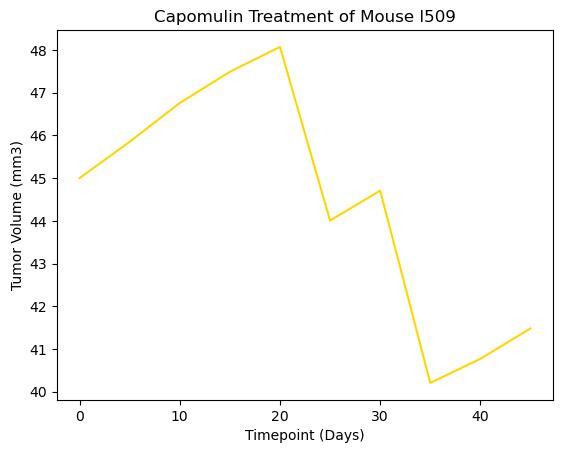

In [58]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


plt.plot(l509Data["Timepoint"],
         l509Data["Tumor Volume (mm3)"],
         color='gold')
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show

In [59]:
capomulinAverageDF= capomulinDF.groupby("Mouse ID").mean()
capomulinAverageDF.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0
g288,22.5,41.990097,0.8,3.0,19.0
g316,22.5,44.613344,1.0,22.0,22.0


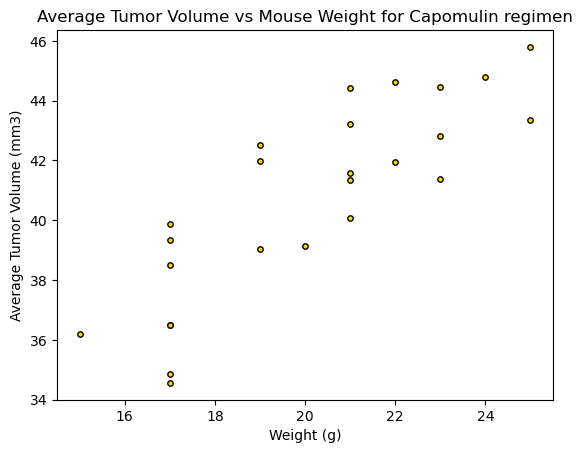

In [64]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(
    capomulinAverageDF["Weight (g)"],
    capomulinAverageDF["Tumor Volume (mm3)"],
    facecolor = "gold",
    edgecolor= "black",
    s=15
)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin regimen")
plt.show()


In [67]:
corr = st.pearsonr(capomulinAverageDF['Weight (g)'], capomulinAverageDF['Tumor Volume (mm3)'])[0]
corr

0.8419363424694718

In [68]:
print(f"The correlation between mouse weight and the average tumor volume is {corr:.2f}")

The correlation between mouse weight and the average tumor volume is 0.84


## Correlation and Regression

In [71]:
# Calculate the correlation coefficient and linear regression model x_values = capomulinAverageDF["Weight (g)"]
y_values = capomulinAverageDF["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulinAverageDF['Weight (g)'],
                                                           capomulinAverageDF['Tumor Volume (mm3)'])
regressvalues = x_values * slope + intercept
lineEQ = f"y = {slope:.2f}x + {intercept:.2f}"

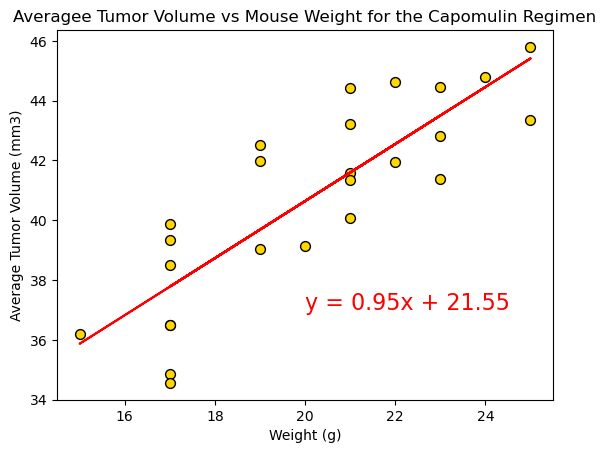

In [73]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(x_values, y_values, facecolor="gold", edgecolor="black", s=50)
plt.plot(x_values, regressvalues, "r-")
plt.annotate(lineEQ, (20, 37), fontsize = 16, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Averagee Tumor Volume vs Mouse Weight for the Capomulin Regimen")
plt.show()
